In [19]:
import heapq

def a_star(graph, start, goal, heuristic):
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {node: float('inf') for node in graph}
    g_score[start] = 0
    f_score = {node: float('inf') for node in graph}
    f_score[start] = heuristic[start]

    while open_set:
        _, current = heapq.heappop(open_set)
        
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]

        for neighbor, weight in graph[current].items():
            tentative_g_score = g_score[current] + weight
            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + heuristic[neighbor]
                if not any(neighbor == item[1] for item in open_set):
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return None  # No path found

# Example graph and heuristic
graph = {
    'A': {'B': 1, 'C': 3},
    'B': {'A': 1, 'D': 1, 'E': 5},
    'C': {'A': 3, 'F': 2},
    'D': {'B': 1},
    'E': {'B': 5, 'F': 2},
    'F': {'C': 2, 'E': 2}
}
heuristic = {
    'A': 7, 'B': 6, 'C': 2, 'D': 1, 'E': 0, 'F': 3
}

# Find shortest path
start, goal = 'A', 'D'
path = a_star(graph, start, goal, heuristic)
print("Shortest path using A*: ", path)


Shortest path using A*:  ['A', 'B', 'D']


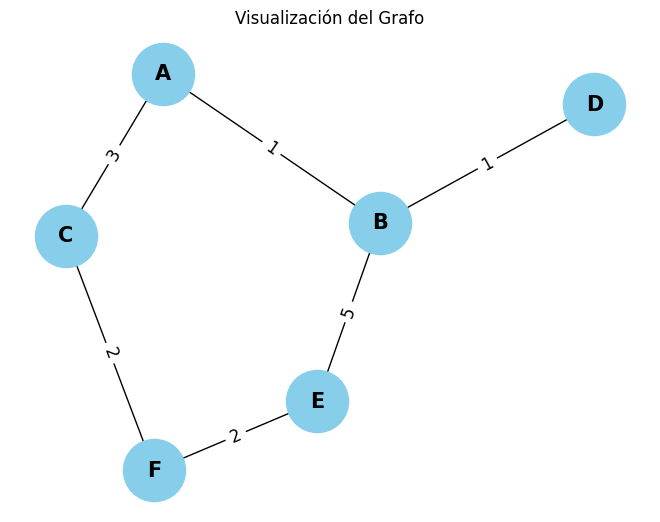

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

# Definir el grafo como un diccionario
graph = {
    'A': {'B': 1, 'C': 3},
    'B': {'A': 1, 'D': 1, 'E': 5},
    'C': {'A': 3, 'F': 2},
    'D': {'B': 1},
    'E': {'B': 5, 'F': 2},
    'F': {'C': 2, 'E': 2}
}

# Convertir el diccionario a un grafo de NetworkX
G = nx.Graph()
for node, neighbors in graph.items():
    for neighbor, weight in neighbors.items():
        G.add_edge(node, neighbor, weight=weight)

# Graficar el grafo
pos = nx.spring_layout(G)  # Generar la disposición de los nodos
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=15, font_weight='bold')

# Dibujar los pesos de las aristas
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12)

plt.title("Visualización del Grafo")
plt.show()


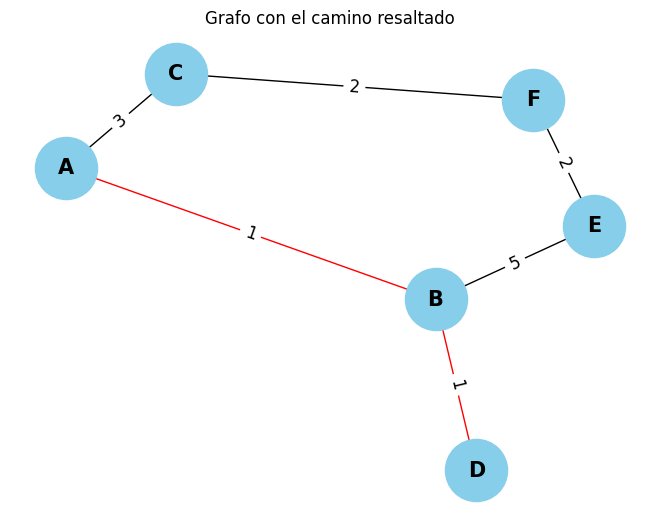

In [21]:


# Crear un grafo como antes
G = nx.Graph()
for node, neighbors in graph.items():
    for neighbor, weight in neighbors.items():
        G.add_edge(node, neighbor, weight=weight)

# Colores para resaltar el camino
edge_colors = ['red' if (u in path and v in path and abs(path.index(u) - path.index(v)) == 1) else 'black' for u, v in G.edges()]

# Graficar
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=15, font_weight='bold', edge_color=edge_colors)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12)

plt.title("Grafo con el camino resaltado")
plt.show()